In [2]:
import pandas as pd
import seaborn as sns #For visulisation
import matplotlib.pyplot as plt #For visulisation
import numpy as np

from sklearn.feature_selection import mutual_info_classif

pd.set_option('display.max_columns', 100) #replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', 100) #replace n with the number of rows you want to see completely

# Read the data
train_data_original = pd.read_csv('./Data/train.csv')
metadata= pd.read_csv('./Data/greeks.csv')

In [50]:
train_data_original

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.238680,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.238680,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.238680,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.238680,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.238680,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,21.1860,167.877117,27.287375,365.516874,257.432377,41.368691,0.691257,55.163024,4.780452,0.013930,1.177525,0.698250,40.159779,1.070298,7.030640,21.75904,355.930925,0.238680,0.445479,176.977590,90.91832,27.957928,0.005518,2.41906,32.508604,8.015112,1.354416,495.086300,0.003042,A,51.618996,78.526968,65.821872,29.708112,0.296850,17167.209610,9.879296,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,27.1887,285.628059,344.644105,505.006814,257.432377,61.910576,0.772304,85.233928,6.682597,0.038208,1.050225,0.761025,39.852923,2.146113,33.648

In [51]:
train_data_original.groupby('Class')['Class'].count()

Class
0    509
1    108
Name: Class, dtype: int64

In [52]:
train_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

- One ID variable
- 55 scalar variables
- 1 categorical variable(EJ)

In [116]:
train_data_original.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,557.000000,617.000000,617.000000,615.000000,614.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,557.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,21.419492,231.322223,98.328737,1218.133238,550.632525,77.104151,0.688801,90.251735,11.241064,0.030615,1.403761,0.742262,36.917590,1.383792,27.165653,51.128326,401.901299,0.633884,0.367002,146.972099,94.795377,26.370568,1.802900,1.924830,26.388989,9.072700,3.064778,1731.248215,0.305107,69.582596,105.060712,69.117005,71.341526,6.930086,10306.810737,10.111079,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,3.478278,183.992505,96.479371,7575.293707,2076.371275,159.049302,0.263994,51.585130,13.571133,0.014808,1.922210,0.281195,17.266347,0.538717,14.645993,21.210888,317.745623,1.912384,0.112989,86.084419,28.243187,8.038825,9.034721,1.484555,18.116679,6.200281,2.058344,1790.227476,1.847499,38.555707,68.445620,390.187057,165.551545,64.754262,11331.294051,2.934025,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,9.886800,72.948951,1.331155,51.216883,257.432377,12.499760,0.176874,23.387600,0.510888,0.003184,1.050225,0.069225,13.784111,0.137925,7.030640,6.906400,35.998895,0.238680,0.040995,60.232470,10.345600,6.339496,0.005518,1.743070,0.804068,4.926396,0.286201,185.594100,0.003042,5.394675,78.526968,3.828384,7.534128,0.296850,1563.136688,3.583450,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,19.420500,156.847239,27.834425,424.990642,257.432377,23.317567,0.563688,64.724192,5.066306,0.023482,1.050225,0.589575,29.782467,1.070298,7.030640,37.942520,188.815690,0.238680,0.295164,102.703553,78.232240,20.888264,0.005518,1.743070,14.715792,5.965392,1.648679,1111.160625,0.003042,30.927468,78.526968,4.324656,25.815384,0.296850,5164.666260,8.523098,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,21.186000,193.908816,61.642115,627.417402,257.432377,42.554330,0.658715,79.819104,9.123000,0.027860,1.050225,0.730800,34.835130,1.351665,36.019104,49.180940,307.509595,0.238680,0.358023,130.050630,96.264960,25.248800,0.251741,1.743070,21.642456,8.149404,2.616119,1493.817413,0.085176,71.949306,78.526968,22.641144,36.394008,1.870155,7345.143424,9.945452,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,23.657700,247.803462,134.009015,975.649259,257.432377,77.310097,0.772206,99.813520,13.565901,0.034427,1.228445,0.859350,40.529401,1.660617,37.935832,61.408760,507.896200,0.238680,0.426348,165.836955,110.640680,30.544224,1.058690,1.743070,34.058344,10.503048,3.910070,1905.701475,0.237276,109.125159,112.766654,49.085352,56.714448,4.88021

In [159]:
# Range of all numerical columns
train_data_numerical=train_data_original.drop(['Id','EJ','Class'], axis=1)
train_data_numerical.max() - train_data_numerical.min()

AB          6.080479
AF      28495.594380
AH       1824.923051
AM        627.340708
AR        170.804946
AX         37.571019
AY         10.290273
AZ         35.574790
BC       1462.463548
BD      51366.974920
BN         19.420500
BP       2374.861599
BQ        343.312950
BR     179199.036017
BZ      49835.026923
CB       2258.936407
CC          3.926157
CD        610.146808
CF        200.456638
CH          0.220890
CL         30.637927
CR          2.970450
CS        254.158712
CU          4.813582
CW         57.490984
DA        203.424520
DE       2067.406295
DF         37.656333
DH          1.019409
DI        988.935608
DL        315.890600
DN         56.468600
DU        161.349797
DV         23.449860
DY        151.551096
EB         90.032184
EE         18.038725
EG      30058.164680
EH         42.566706
EL        103.730484
EP        985.067610
EU       6497.436096
FC       3023.121696
FD       1578.357387
FE     141661.545612
FI         32.267589
FL        137.759510
FR       1243

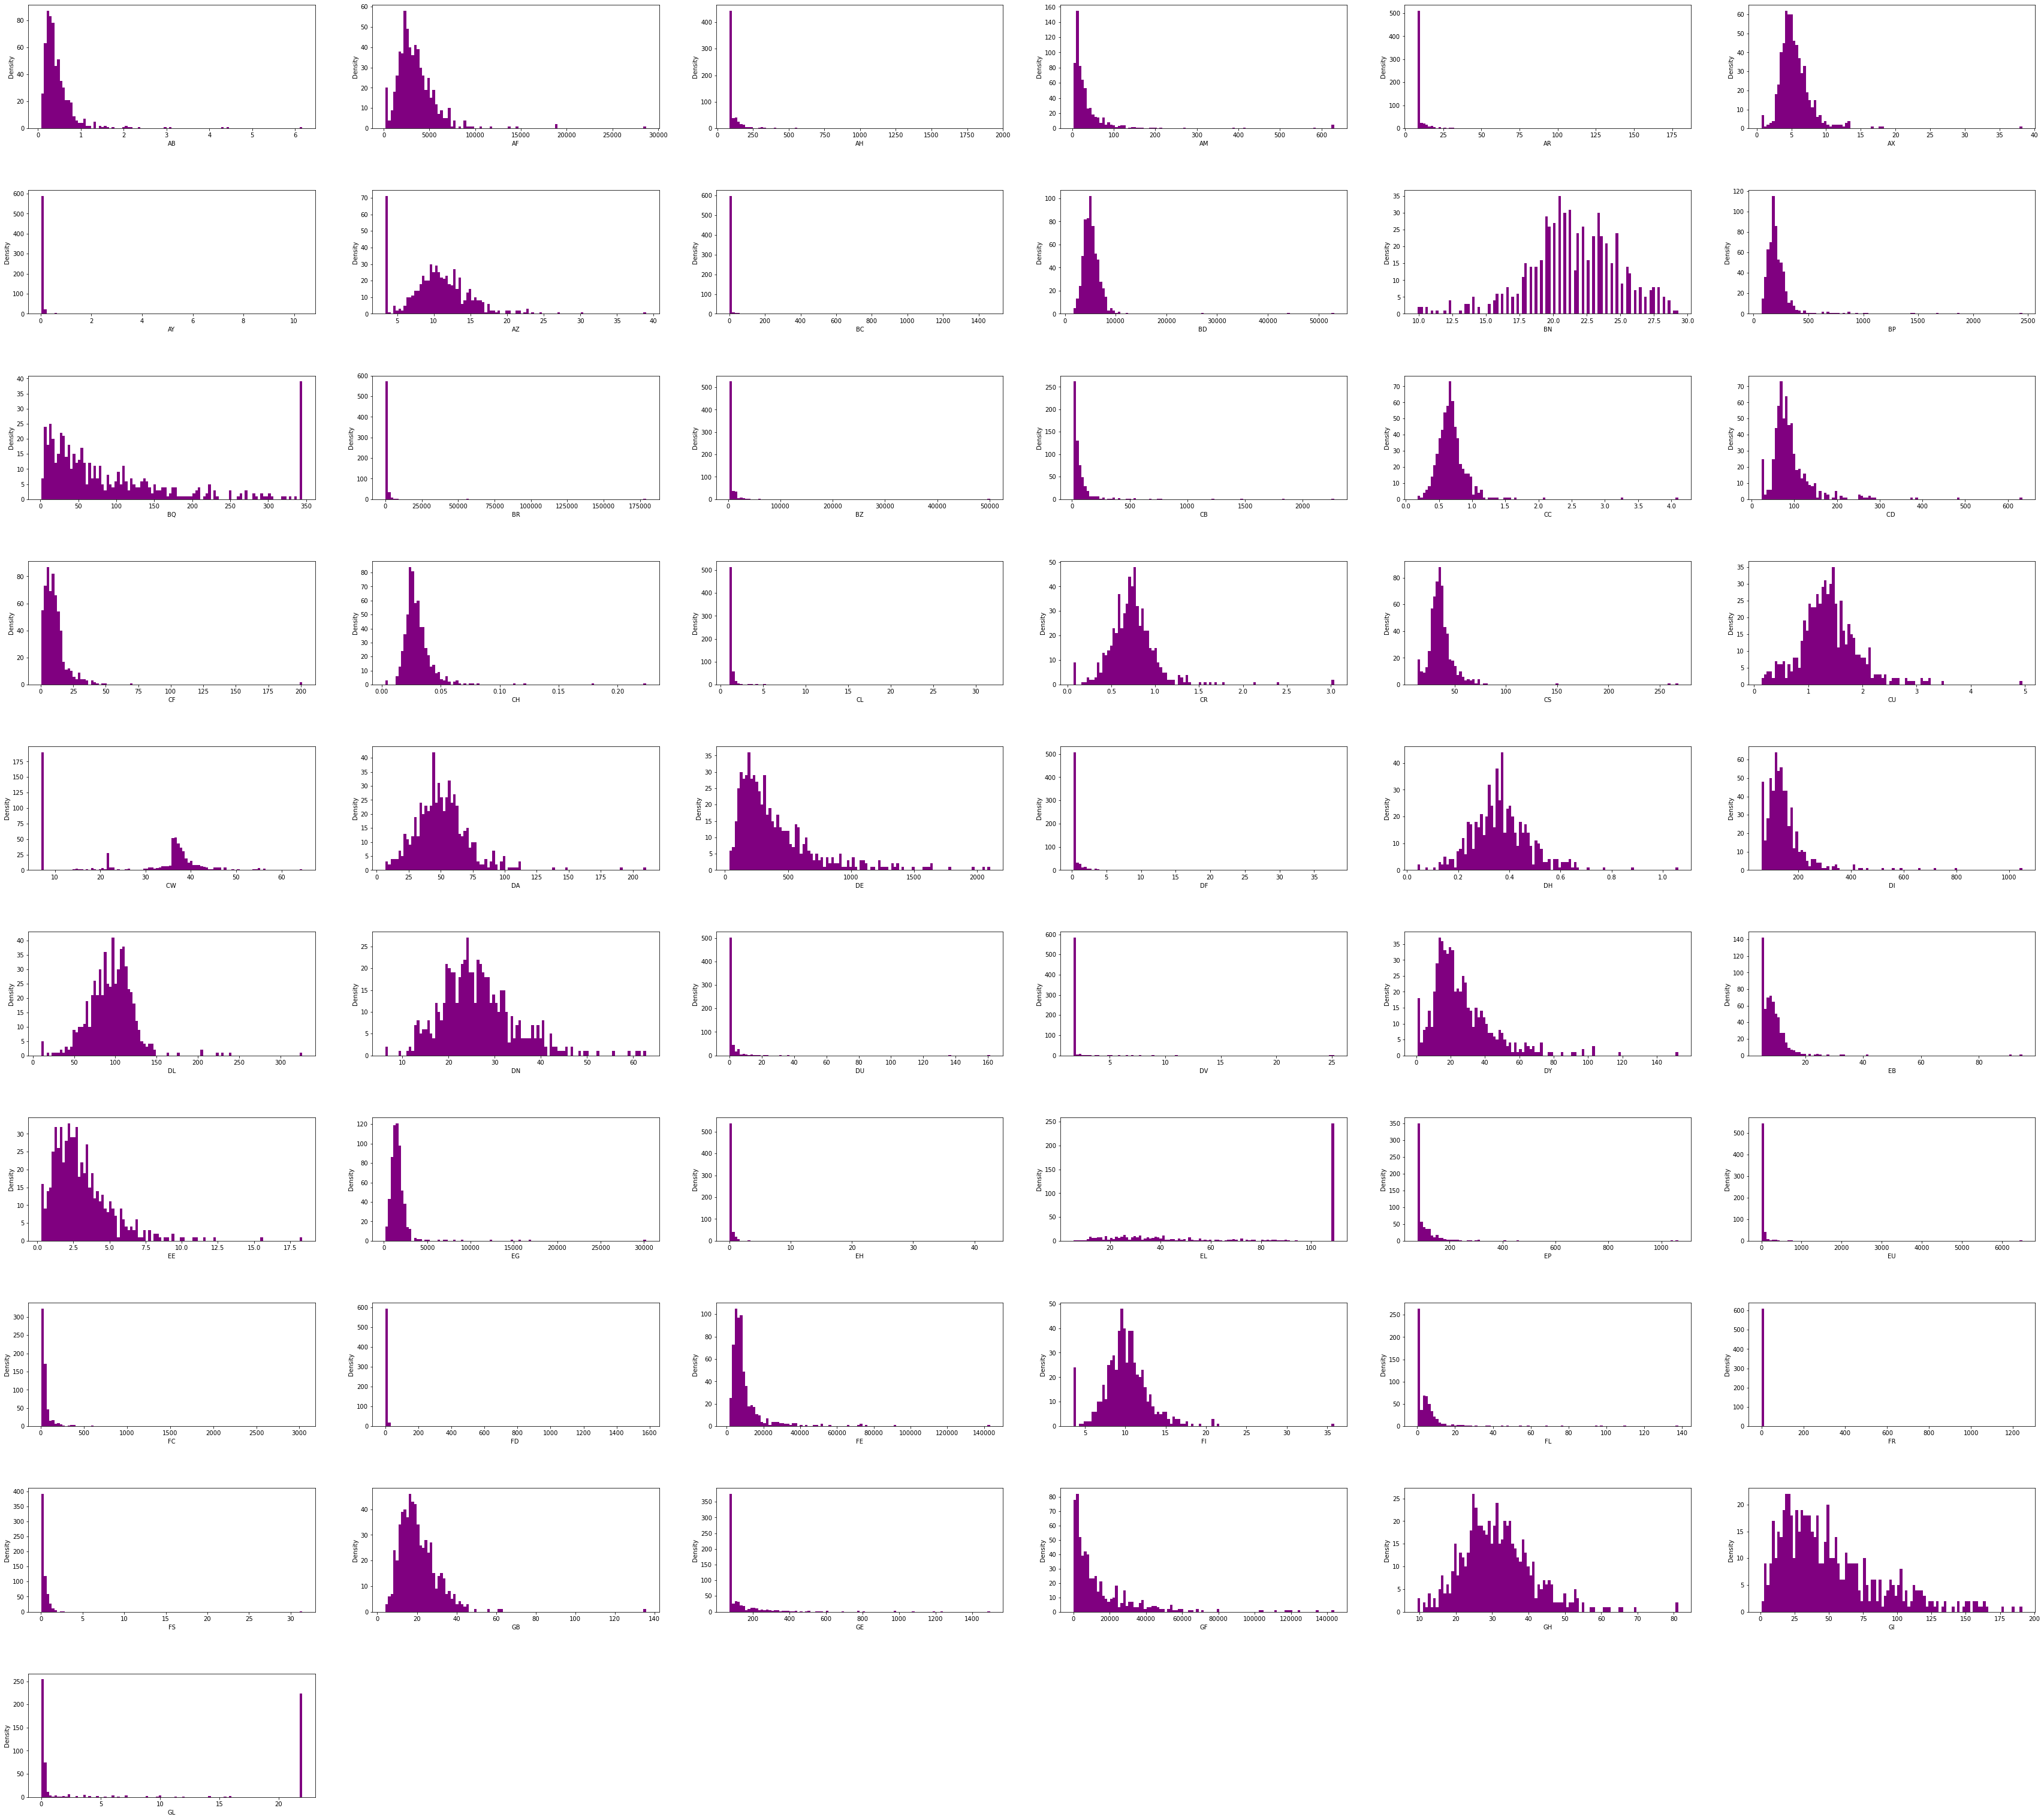

In [54]:
features=train_data_original.columns.drop(['Id','Class','EJ'])

plt.figure(figsize=(60, 55))
plt.subplots_adjust(hspace=0.5)

# loop through the length of tickers and keep track of index
for n, feature in enumerate(features):
    # add a new subplot iteratively
    plt.subplot(10, 6, n+1)
    plt.hist(train_data_original[feature], bins=100, color='purple')
    plt.xlabel(feature)
    plt.ylabel('Density')

C:\Users\Nicolas\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\Nicolas\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\Nicolas\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\Nicolas\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\Nicolas\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
C:\Users\Nicolas\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: 

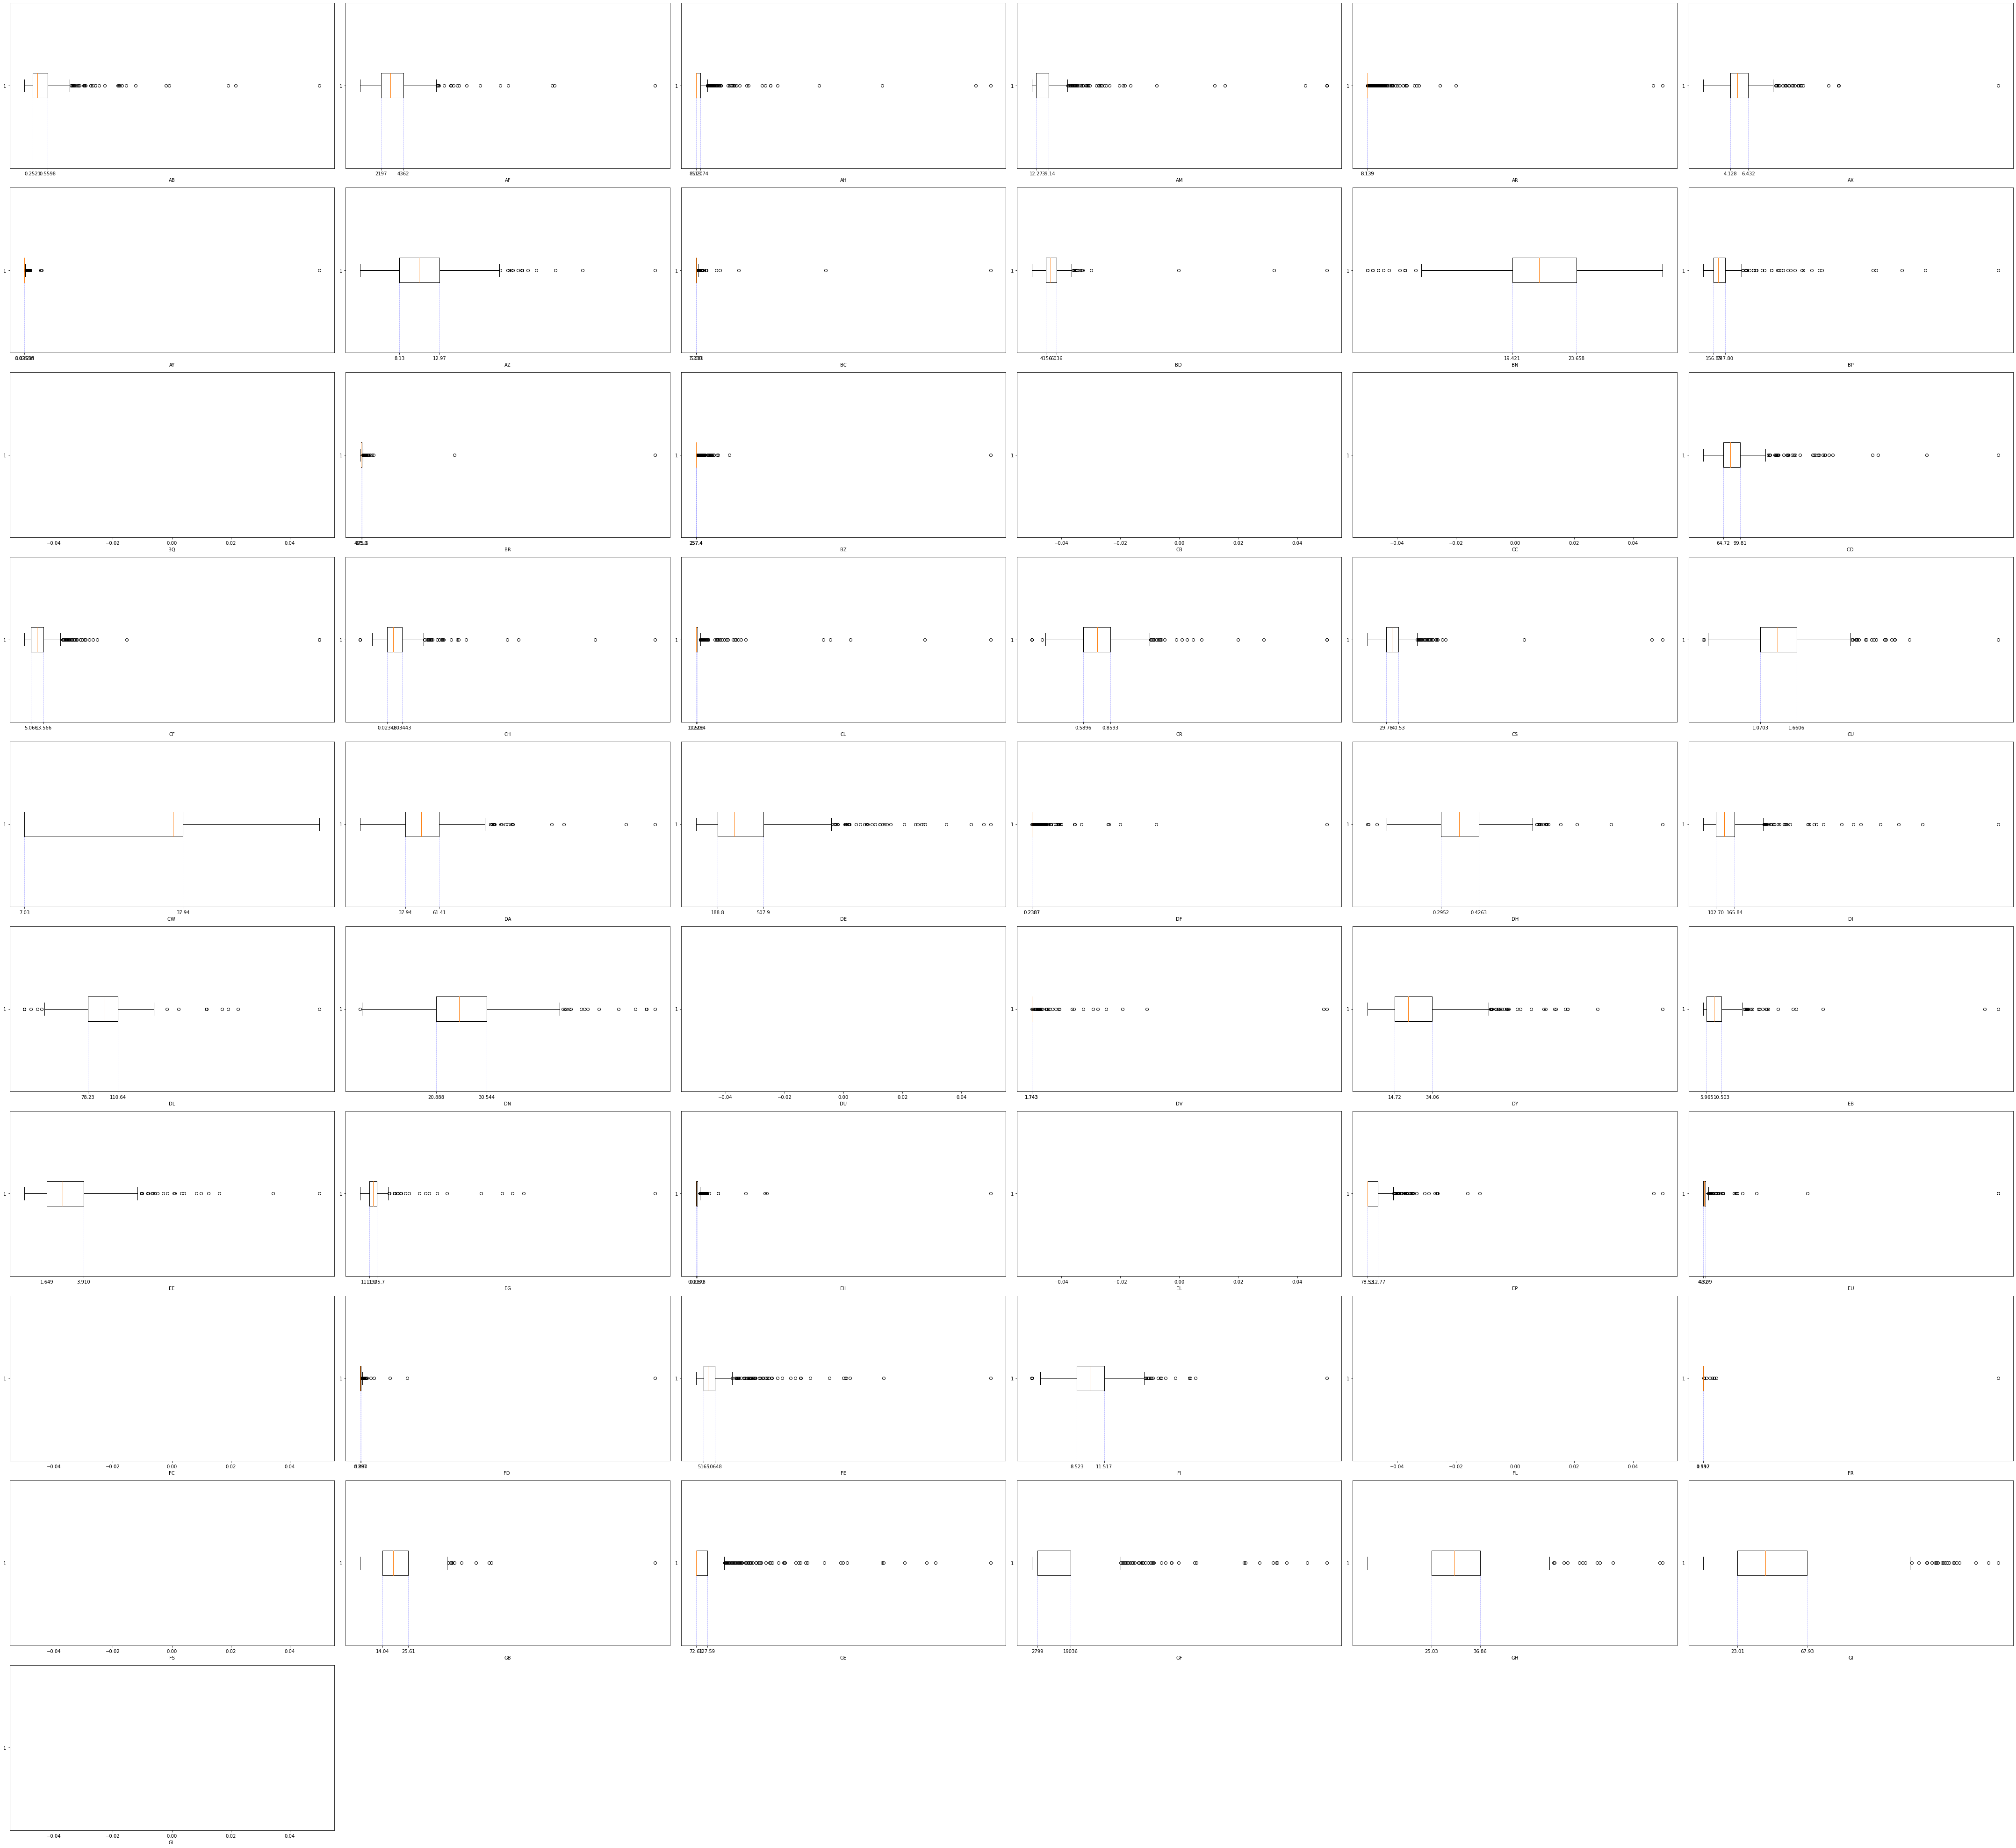

In [81]:
import math
plt.figure(figsize=(60,55))

for i,feature in enumerate(features):    
    plt.subplot(10,6,i + 1)
    plt.boxplot(train_data_original[feature].astype('float'),vert=False)
    q=np.quantile(train_data_original[feature], [0.25,0.75])

    plt.vlines(q, [0] * q.size, [1] * q.size,
          color='b', ls=':', lw=0.5, zorder=0)
    plt.ylim(0.5, 1.5)

    if math.isnan(q[0])==False or math.isnan(q[1])==False:
        plt.xticks(q)
    plt.xlabel(feature)
    

plt.tight_layout()

plt.show()

In [82]:
train_data_original.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [88]:
print('Cardinality of categorical feature EJ: ', train_data_original['EJ'].nunique())
print('Unique values for feature EJ: ', train_data_original.EJ.unique())

Cardinality of categorical feature EJ:  2
Unique values for feature EJ:  ['B' 'A']


<AxesSubplot:>

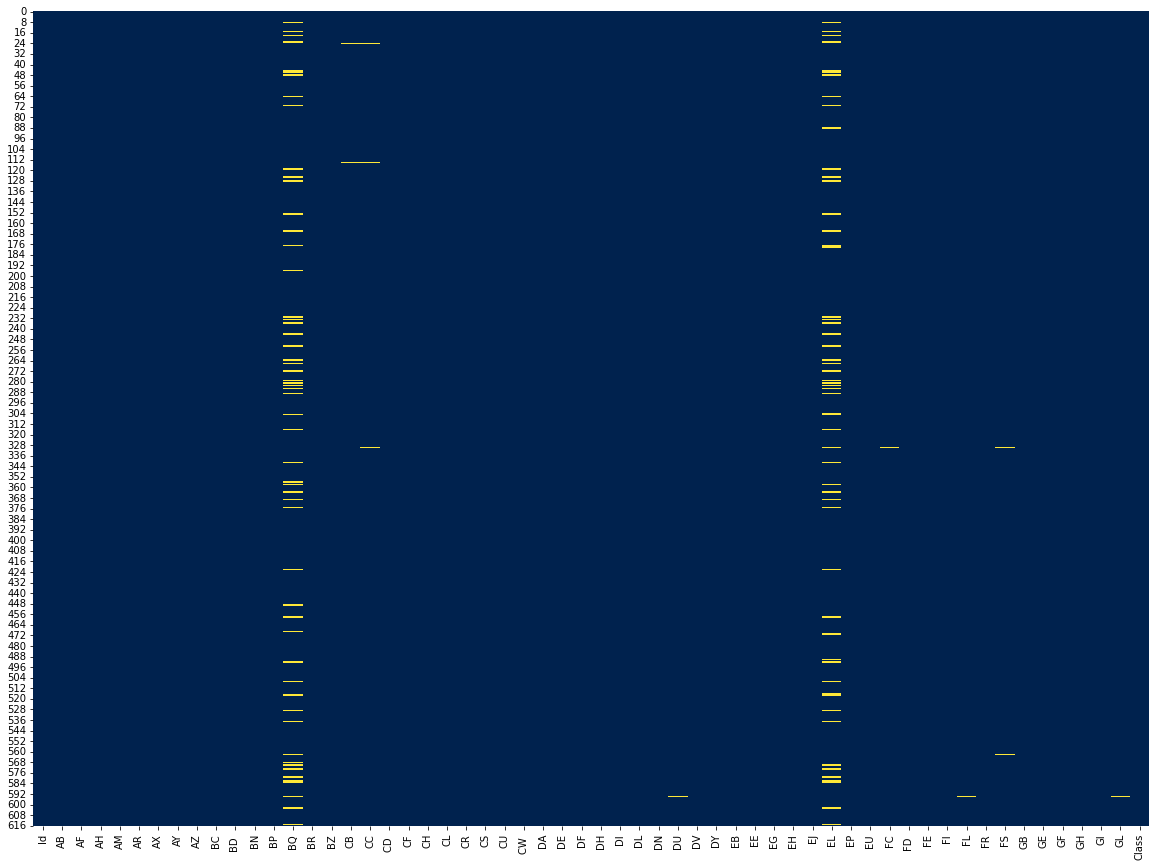

In [100]:
plt.rcParams["figure.figsize"] = (20,15)
sns.heatmap(train_data_original.isnull(),cbar=False,cmap='cividis')

BO and EL are the columns with the highest number of missing values.
We will replace nan values with mean after splitting.
CAUTION: if you want to use this for Machine Learning / Data Science: from a Data Science perspective it is wrong to first replace NA and then split into train and test... You MUST first split into train and test, then replace NA by mean on train and then apply this stateful preprocessing model to test, because otherwise you are leaking information from the test set into the training set! 

<Axes: >

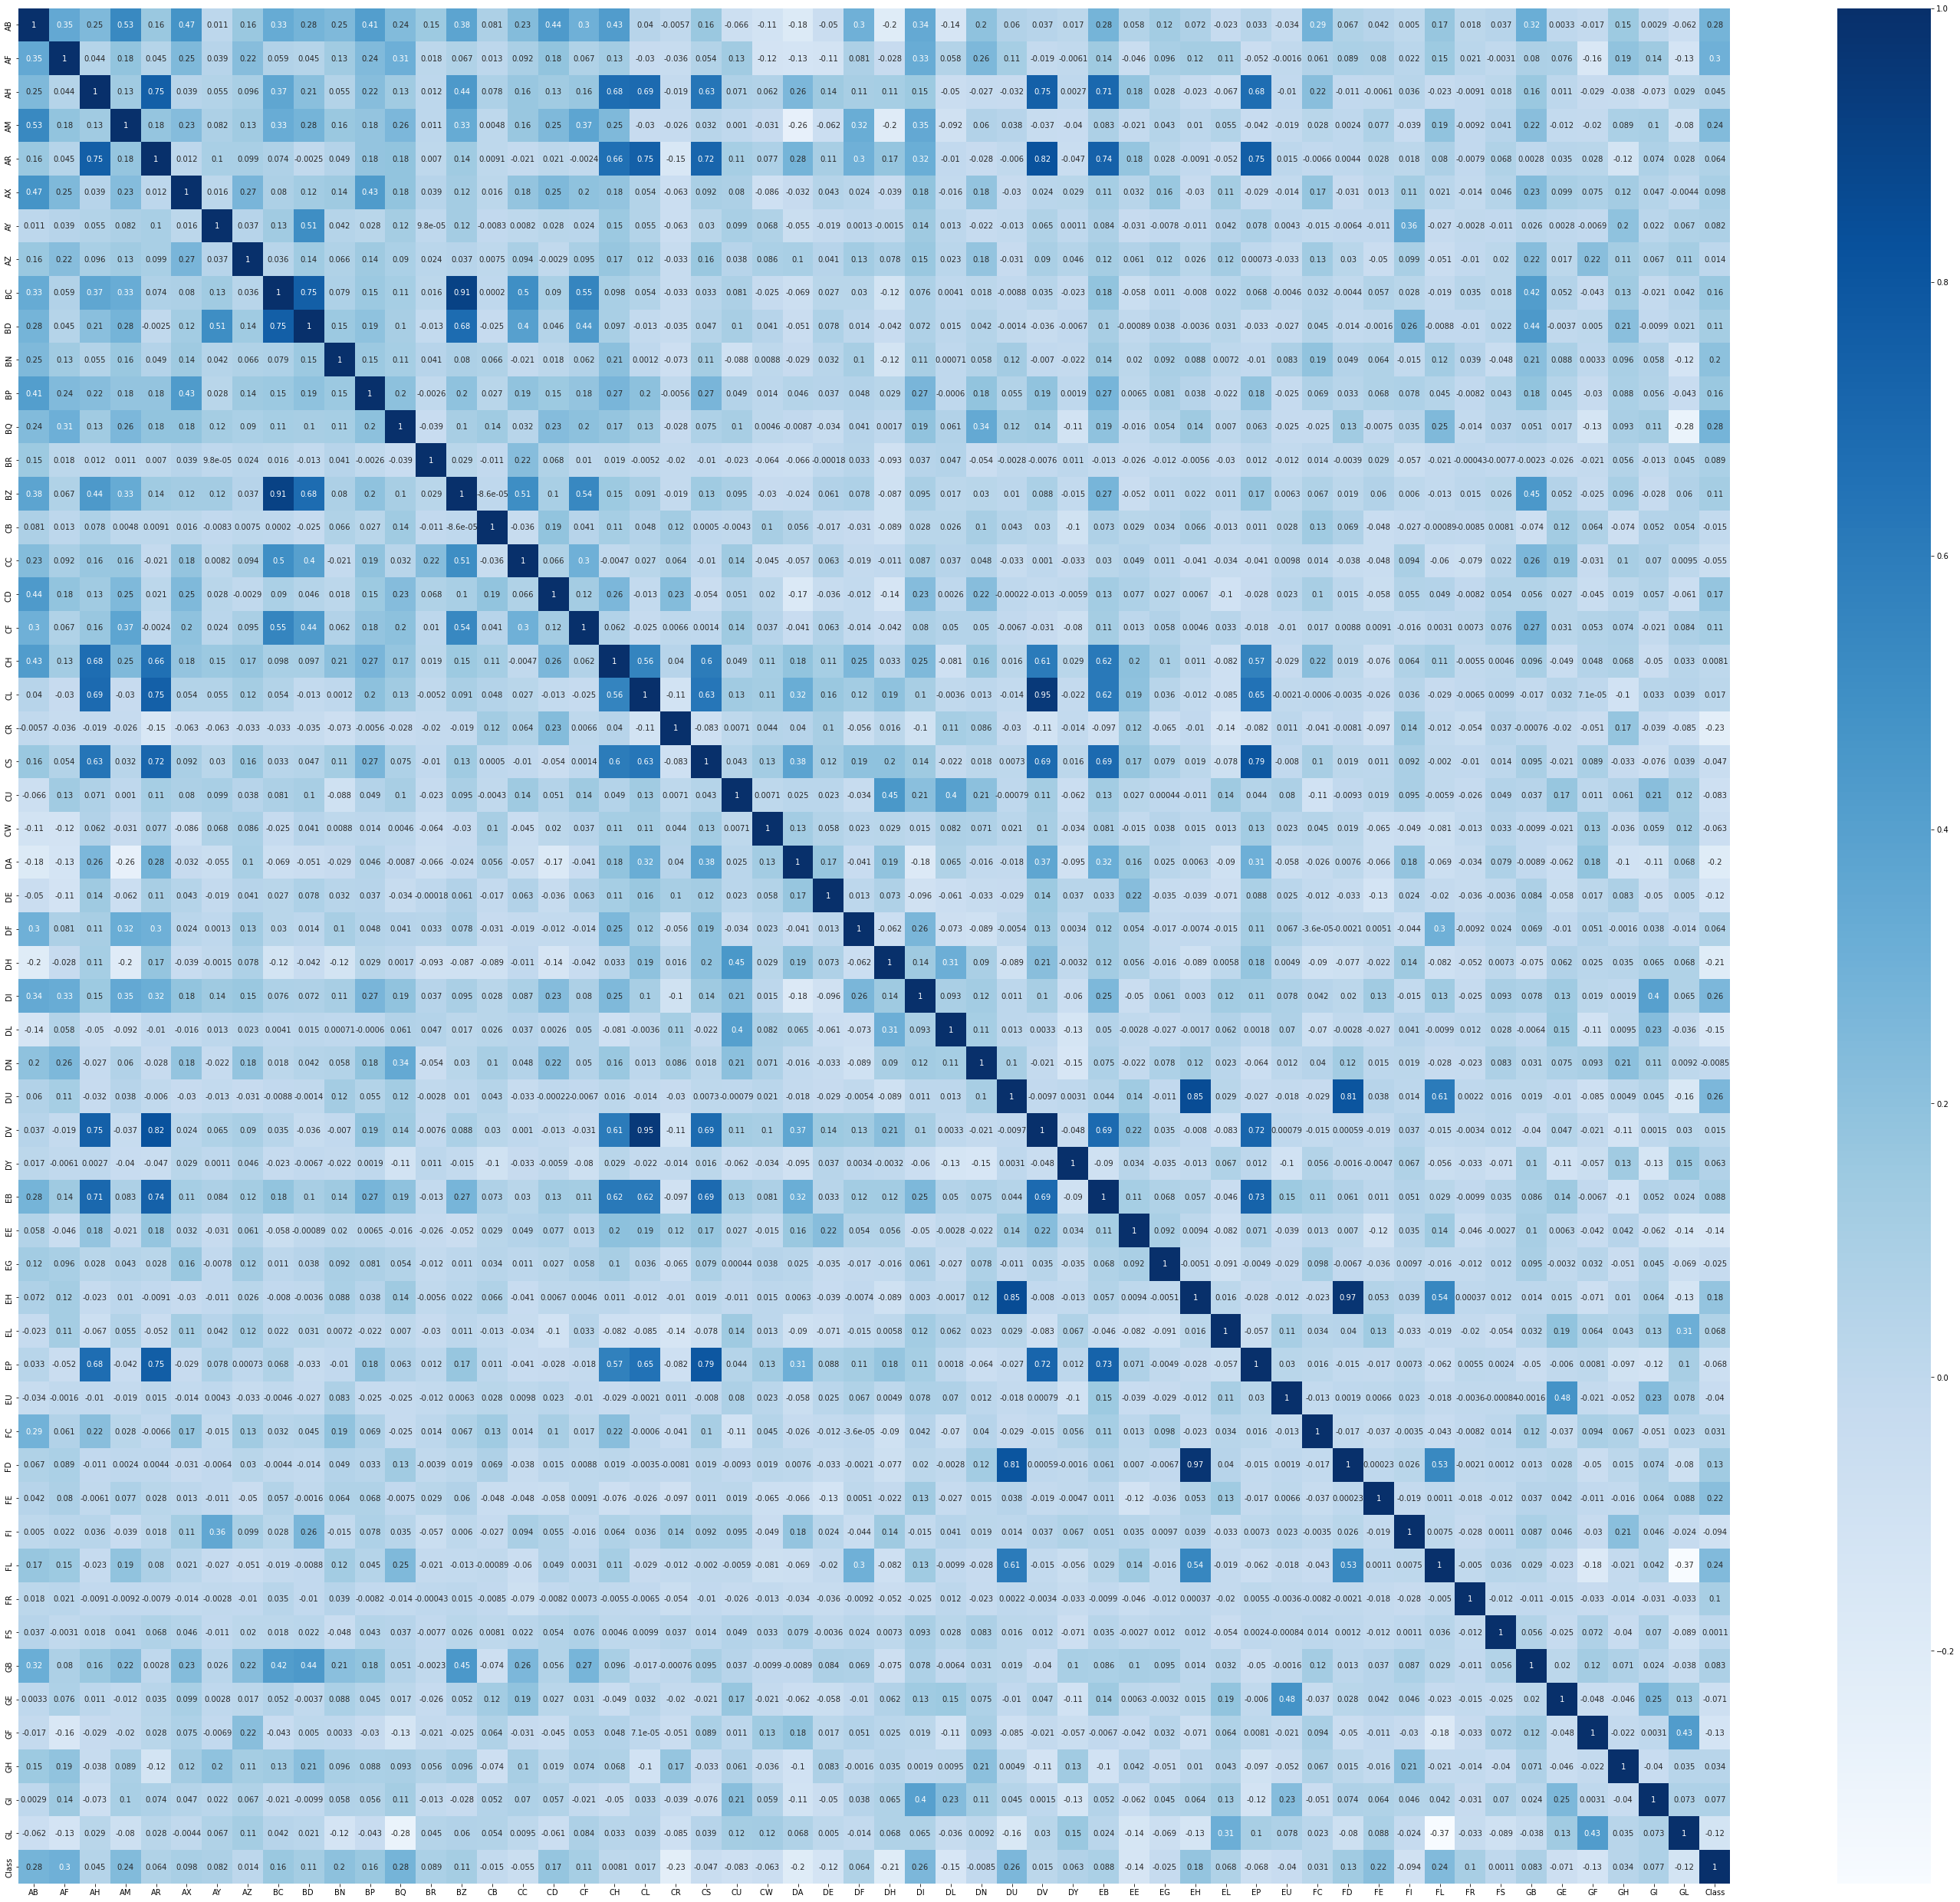

In [4]:
correlations= train_data_original.corr()
plt.rcParams["figure.figsize"] = (50,45)
sns.heatmap(correlations, annot=True,cbar=True,cmap='Blues')

<Axes: >

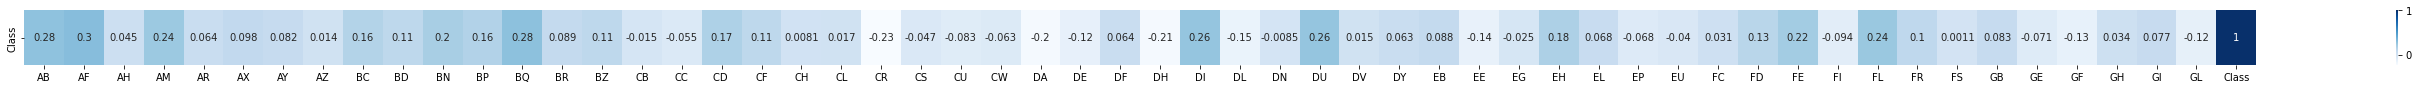

In [5]:
plt.subplots(figsize = (50, 1))
sns.heatmap(correlations[55:56], annot=True, cmap='Blues')

In [13]:
cors=correlations[55:56]
cors.nlargest(10)

TypeError: nlargest() missing 1 required positional argument: 'columns'

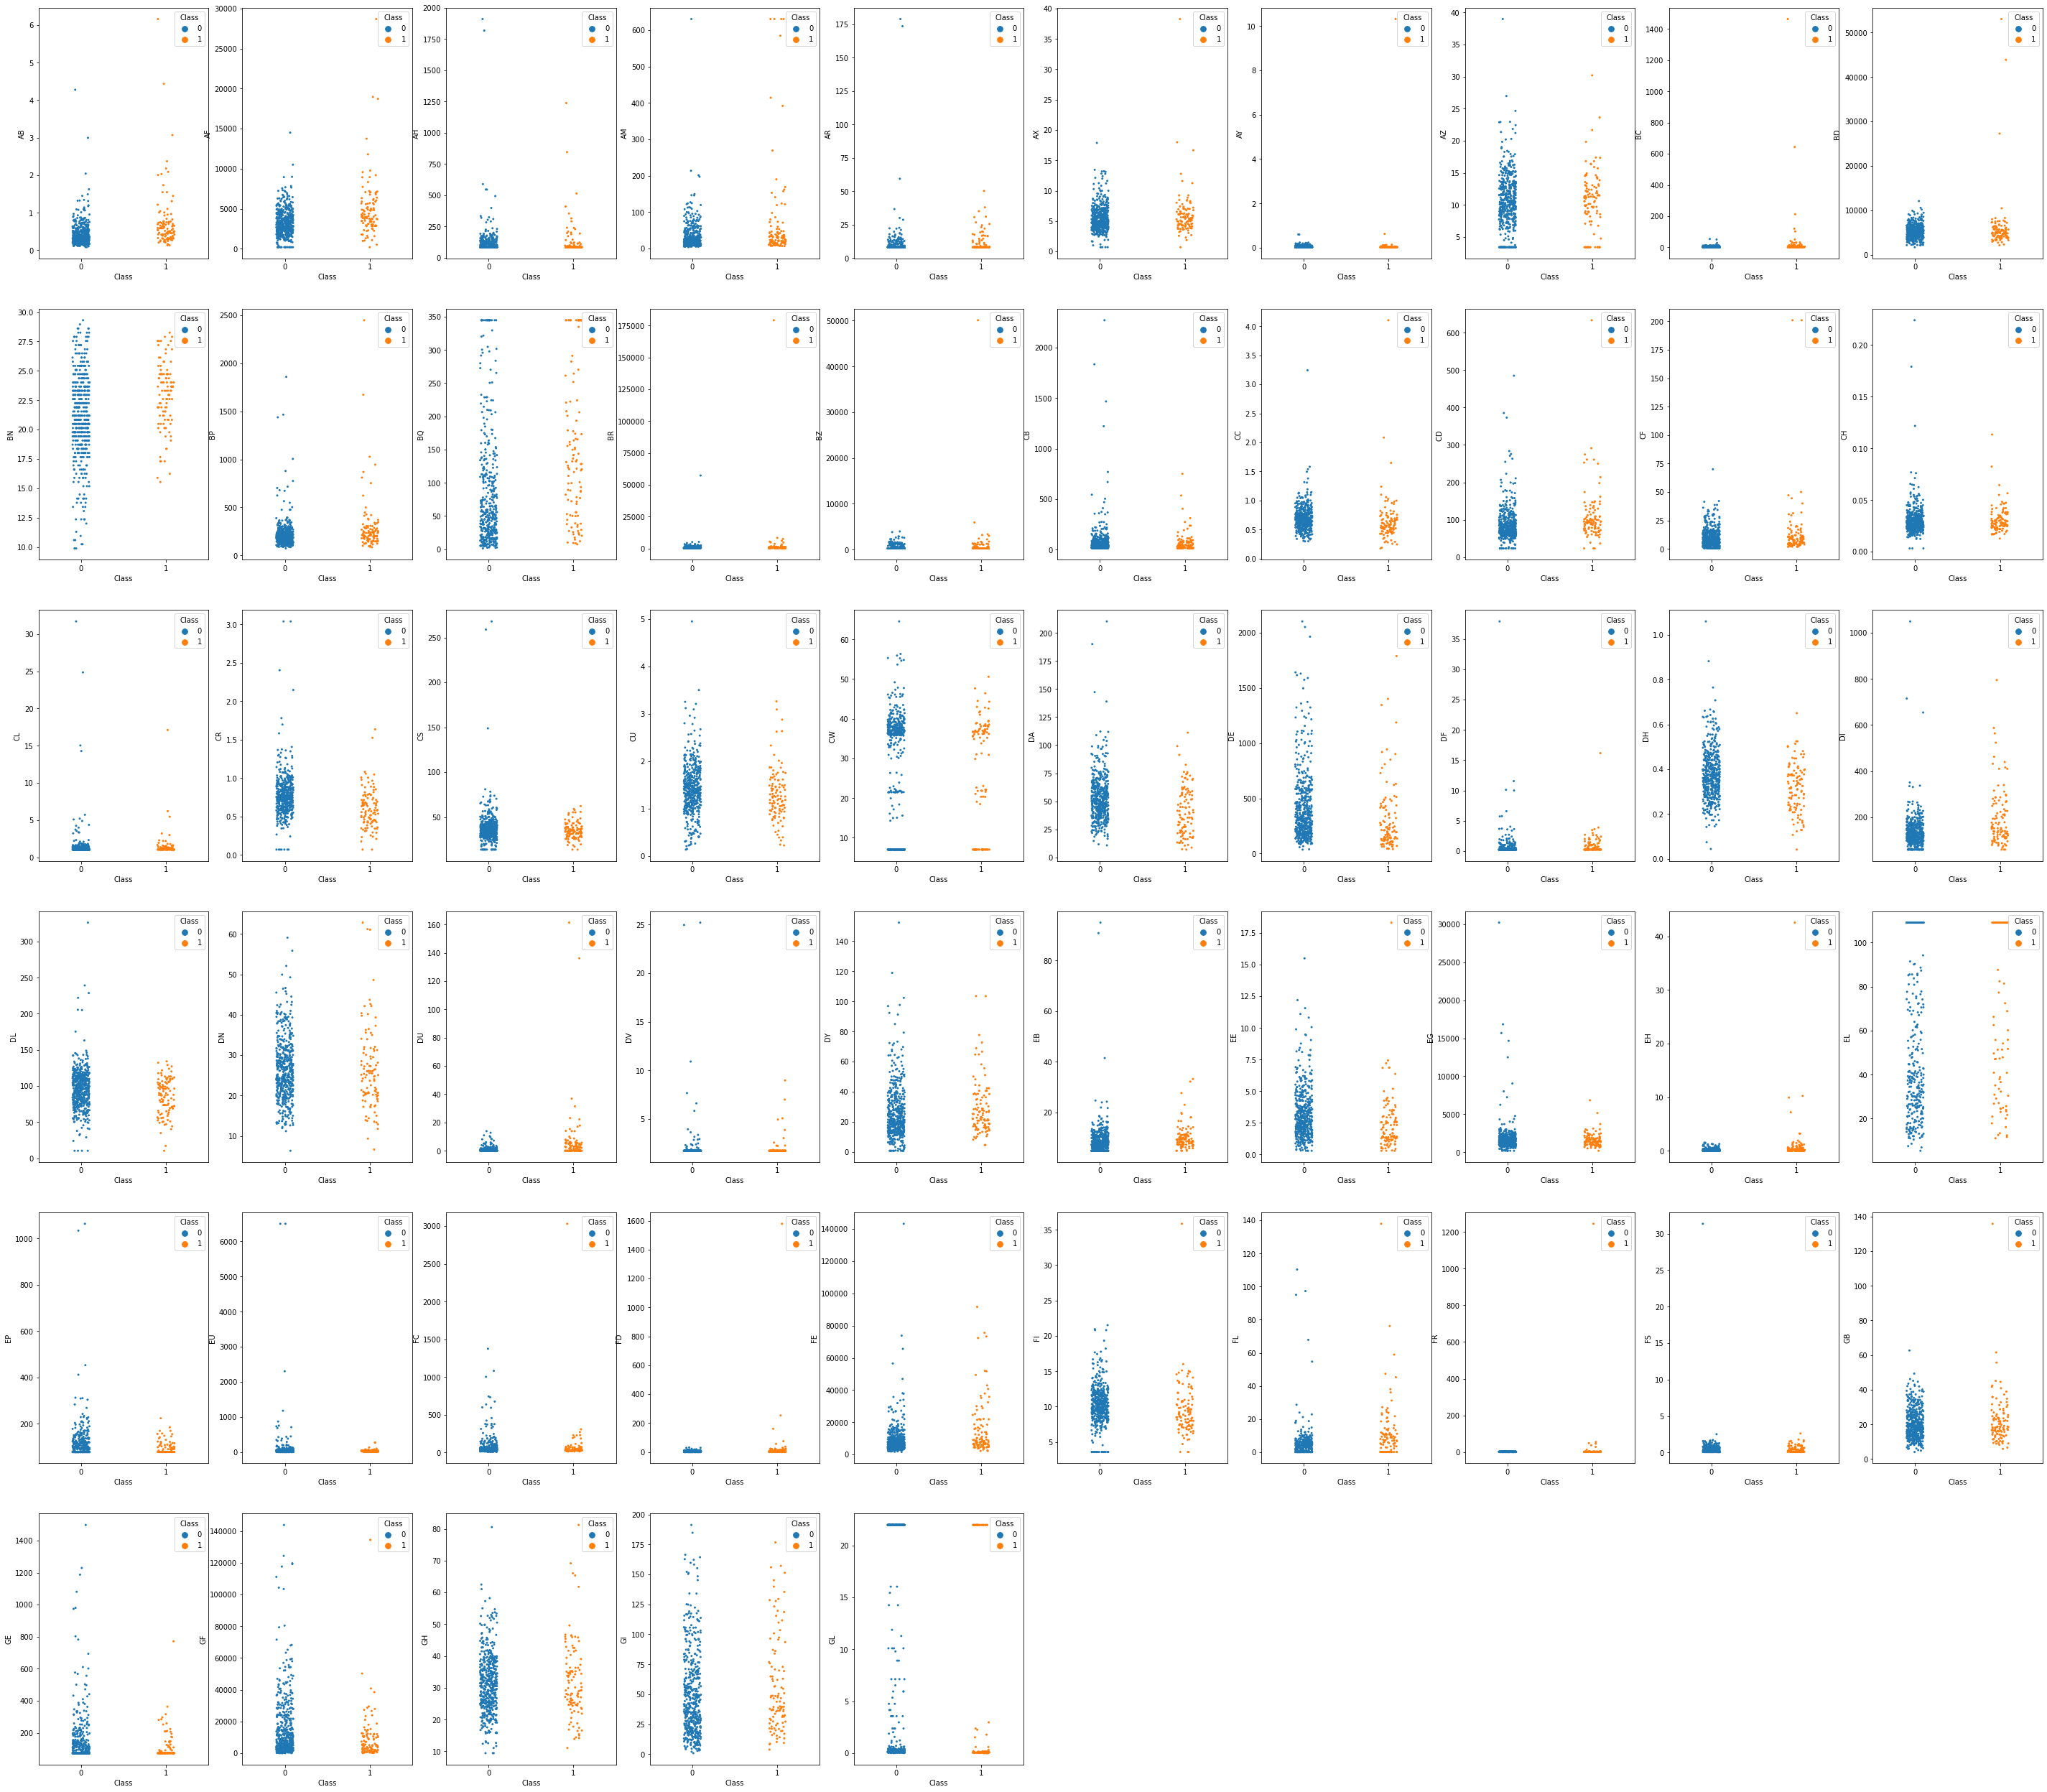

In [136]:
f = plt.figure()
for i in range(len(features)):
    f.add_subplot(6, 10, i+1)
    sns.stripplot(data=train_data_original, x="Class", y=features[i], hue="Class",size=3)
plt.show()

### Transforming to eliminate skewness

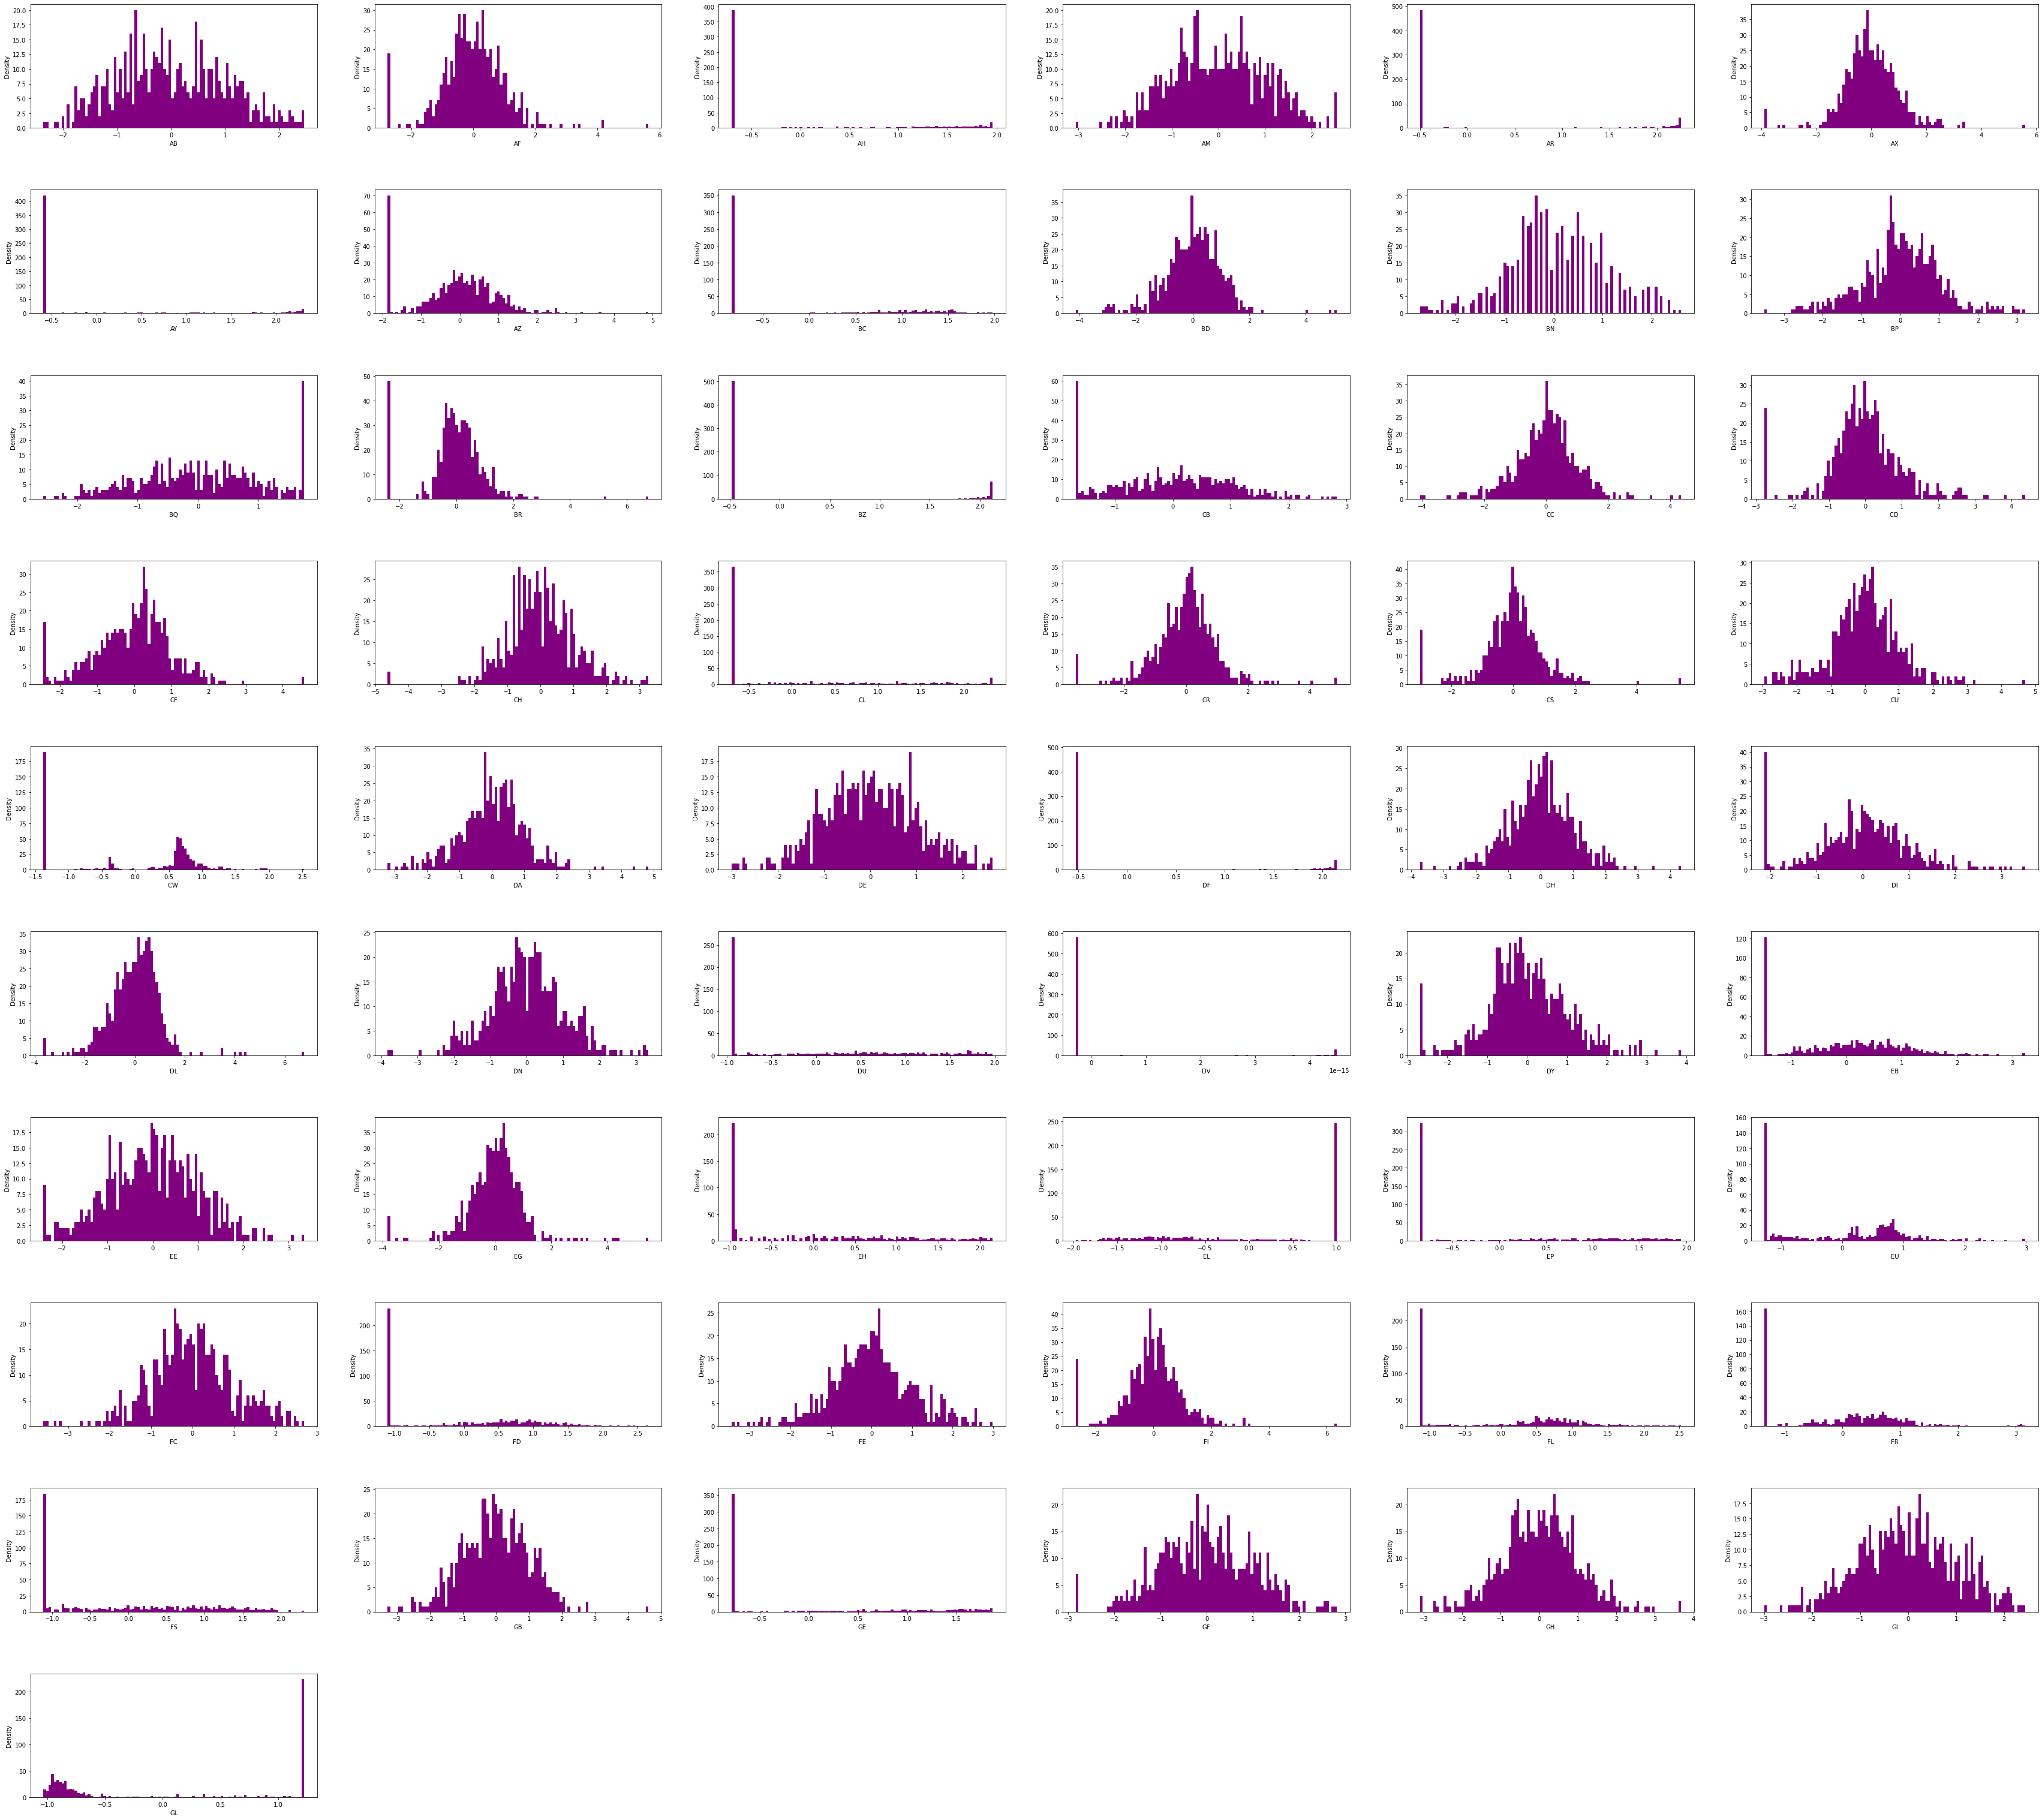

In [168]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
train_data_transformed=train_data_original.drop(['Id','EJ','Class'], axis=1)
train_data_transformed=pt.fit_transform(train_data_transformed)

train_data_transformed_df=pd.DataFrame(data=train_data_transformed,columns=features)

plt.figure(figsize=(60, 55))
plt.subplots_adjust(hspace=0.5)

# loop through the length of tickers and keep track of index
for n, feature in enumerate(features):
    # add a new subplot iteratively
    plt.subplot(10, 6, n+1)
    plt.hist(train_data_transformed_df[feature], bins=100, color='purple')
    plt.xlabel(feature)
    plt.ylabel('Density')

In [153]:
# Isolating Ids and creating train_data
train_data = train_data_original.copy()
ids= train_data.pop('Id')

In [154]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train_data=enc.fit_transform(train_data)